In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# import thu vien
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
from datetime import datetime
import streamlit as st

In [2]:
# Read datas
df = pd.read_csv('e-commerce.csv')

In [3]:
# # GUI 
# st.title('Data Science Project')
# st.write('## Customer_Segment')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70052 entries, 0 to 70051
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_title           70052 non-null  object 
 1   product_type            70052 non-null  object 
 2   variant_title           70052 non-null  object 
 3   variant_sku             70052 non-null  object 
 4   variant_id              70052 non-null  int64  
 5   customer_id             70052 non-null  int64  
 6   order_id                70052 non-null  int64  
 7   day                     70052 non-null  object 
 8   net_quantity            70052 non-null  int64  
 9   gross_sales             70052 non-null  float64
 10  discounts               70052 non-null  float64
 11  returns                 70052 non-null  float64
 12  net_sales               70052 non-null  float64
 13  taxes                   70052 non-null  float64
 14  total_sales             70052 non-null

In [5]:
df.head(3)

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,1312378,83290718932496,04/12/2018,2,200.0,-200.00,0.00,0.0,0.0,0.0,0,2
1,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686,3715657,36253792848113,01/04/2019,2,190.0,-190.00,0.00,0.0,0.0,0.0,0,2
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,9533448,73094559597229,05/11/2018,0,164.8,-156.56,-8.24,0.0,0.0,0.0,-2,2


In [6]:
# check null
df.isnull().values.any()
# or 
df.isnull().sum()

product_title             0
product_type              0
variant_title             0
variant_sku               0
variant_id                0
customer_id               0
order_id                  0
day                       0
net_quantity              0
gross_sales               0
discounts                 0
returns                   0
net_sales                 0
taxes                     0
total_sales               0
returned_item_quantity    0
ordered_item_quantity     0
dtype: int64

In [7]:
string_to_date = lambda x: datetime.strptime(x , '%d/%m/%Y')

# convert invoiceDate from object to datetime format
df['day'] = df['day'].apply(string_to_date)
df['day'] = df['day'].astype('datetime64[ns]')

# drop NA values

In [8]:
df.isnull().values.any()
# ko co gia tri null

False

In [9]:
df.head(3)

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,1312378,83290718932496,2018-12-04,2,200.0,-200.00,0.00,0.0,0.0,0.0,0,2
1,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686,3715657,36253792848113,2019-04-01,2,190.0,-190.00,0.00,0.0,0.0,0.0,0,2
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,9533448,73094559597229,2018-11-05,0,164.8,-156.56,-8.24,0.0,0.0,0.0,-2,2


In [10]:
# Lets take a look at the data we will need to manipulate
print('Transactions timeframe from {} to {}'.format(df['day'].min(), df['day'].max()))
print('{:,} transactions don\'t have a customer id'.format(df[df.customer_id.isnull()].shape[0]))
print('{:,} uniques customer_id'.format(len(df.customer_id.unique())))

Transactions timeframe from 2018-11-01 00:00:00 to 2019-04-30 00:00:00
0 transactions don't have a customer id
25,543 uniques customer_id


## Create RFM analysis for each customer

In [11]:
# RFM _ BUOC QUAN TRONG DE TAO RA 3 CHI SO R , F ,M
# Convert string to date, get max date of dataframe
max_date  = df['day'].max().date()

Recency = lambda x: (max_date - x.max().date()).days
Frequency = lambda x: len(x.unique())
Monetary = lambda x: round(sum(x) , 2)

df_RFM = df.groupby('customer_id').agg({'day' : Recency,
              'order_id': Frequency,
              'gross_sales' :Monetary }).reset_index()

In [12]:
df_RFM.head(3)

,customer_id,day,order_id,gross_sales
0,1000661,141,1,237.53
1,1001914,158,1,82.50
2,1002167,53,4,211.67


In [13]:
# Rename the columns of DF
df_RFM.columns = [ 'customer_id', 'Recency', 'Frequency', 'Monetary']
# Descending Sorting _ sap xep giam dan theo spending_money
df_RFM = df_RFM.sort_values('Monetary' , ascending= False)

In [14]:
df_RFM.head(3)

,customer_id,Recency,Frequency,Monetary
20541,8325158,4,17,2812.58
2820,2028611,98,17,2661.72
15644,6578818,5,16,2486.73


In [15]:
df_RFM.shape

(25543, 4)

C:\Users\VU\AppData\Local\Temp\ipykernel_13840\983837869.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_RFM['Recency'])
C:\Users\VU\AppData\Local\Temp\ipykernel_13840\983837869.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_RFM['Frequency']) # Plot distribution of F
C:\Users\VU\A

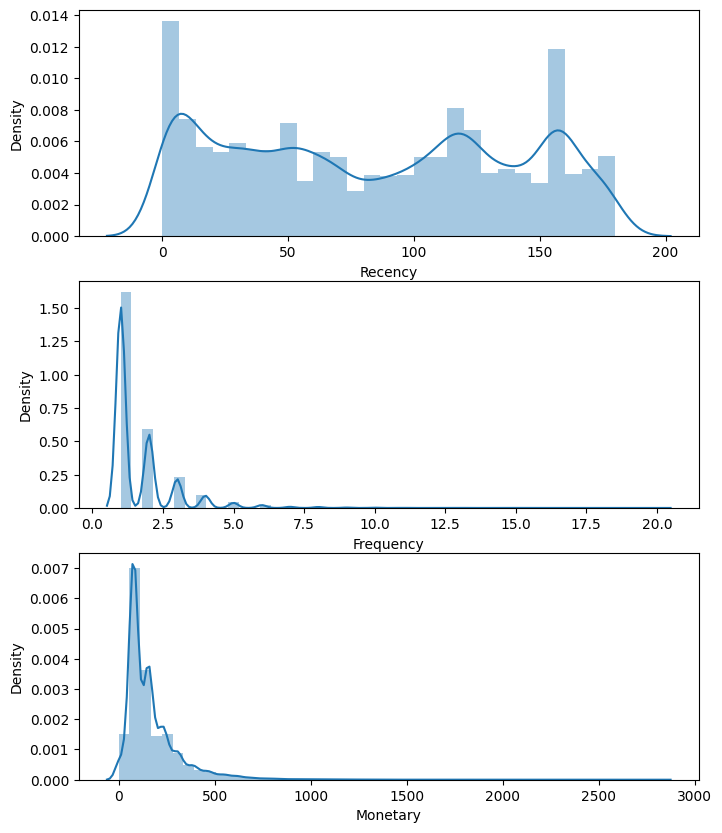

In [16]:
# Visualization

plt.figure(figsize= (8, 10))
plt.subplot(3,1,1)
sns.distplot(df_RFM['Recency'])
plt.subplot(3,1,2)
sns.distplot(df_RFM['Frequency']) # Plot distribution of F
plt.subplot(3,1,3)
sns.distplot(df_RFM['Monetary']) # Plot distribution of M
plt.show()

## Calculate RFM quartiles

In [17]:
#Create labels for Recency , Frequency ,Monetary
r_labels = range(4, 0 , -1) # so ngay tinh tu lan cuoi mua hang lon thi
                          # gan nho, nguoc lai thi dan lon
f_labels = range(1,5)
m_labels = range(1,5)

In [18]:
[*r_labels]

[4, 3, 2, 1]

In [19]:
# Assign these labels to 4 equal percentile groups
r_groups = pd.qcut(df_RFM['Recency'].rank(method = 'first') , q = 4 ,labels = r_labels)
f_groups = pd.qcut(df_RFM['Frequency'].rank(method = 'first') , q = 4 ,labels = f_labels)
m_groups = pd.qcut(df_RFM['Monetary'].rank(method = 'first') , q = 4 ,labels = m_labels)


In [20]:
# Create new columns R , F ,M
df_RFM = df_RFM.assign(R = r_groups.values, F = f_groups.values ,M =m_groups.values)
df_RFM.head()

,customer_id,Recency,Frequency,Monetary,R,F,M
20541,8325158,4,17,2812.58,4,4,4
2820,2028611,98,17,2661.72,2,4,4
15644,6578818,5,16,2486.73,4,4,4
19140,7843272,0,20,2325.06,4,4,4
19692,8032770,50,13,2065.88,3,4,4


## Concat RFM quartile values to create RFM Segments

In [21]:
def join_rfm(x):
    return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))
df_RFM['RFM_Segment'] = df_RFM.apply(join_rfm , axis = 1)

In [22]:
df_RFM.head(3)

,customer_id,Recency,Frequency,Monetary,R,F,M,RFM_Segment
20541,8325158,4,17,2812.58,4,4,4,444
2820,2028611,98,17,2661.72,2,4,4,244
15644,6578818,5,16,2486.73,4,4,4,444


## Count num of unique segments

In [23]:
rfm_count_unique = df_RFM.groupby('RFM_Segment')['RFM_Segment'].nunique()
print(rfm_count_unique[-5:])

RFM_Segment
434    1
441    1
442    1
443    1
444    1
Name: RFM_Segment, dtype: int64


In [24]:
len(rfm_count_unique)

48

In [25]:
print(rfm_count_unique.sum())

48


## Calculate RFM score and level


In [26]:
# Calculate RFM_Score
df_RFM['RFM_Score'] = df_RFM[['R', 'F', 'M']].sum(axis =1 )
df_RFM.head()

,customer_id,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
20541,8325158,4,17,2812.58,4,4,4,444,12
2820,2028611,98,17,2661.72,2,4,4,244,10
15644,6578818,5,16,2486.73,4,4,4,444,12
19140,7843272,0,20,2325.06,4,4,4,444,12
19692,8032770,50,13,2065.88,3,4,4,344,11


## Manual Segmentation

In [27]:
def rfm_level(df):
    if (df['R'] == 4 and df['F'] == 4 and df['M'] == 4):
        return 'STARS'
    elif (df['R'] == 4 and df['F'] == 1 and df['M'] == 1):
        return 'NEW'
    else:
        if df['M'] == 4:
            return 'BIG SPENDER'
        elif df['F'] == 4:
            return 'LOYAL'
        elif df['R'] ==4:
            return 'ACTIVE'
        elif df['R'] == 1:
            return 'LOST'
        elif df['M'] == 1:
            return 'LIGHT'
        return 'REGULAR'

In [28]:
#Create a new column RFM_Level
df_RFM['RFM_Level'] = df_RFM.apply(rfm_level, axis =1)

In [29]:
df_RFM.head(3)

,customer_id,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
20541,8325158,4,17,2812.58,4,4,4,444,12,STARS
2820,2028611,98,17,2661.72,2,4,4,244,10,BIG SPENDER
15644,6578818,5,16,2486.73,4,4,4,444,12,STARS


## Number of segments

In [30]:
df_RFM['RFM_Level'].value_counts()

LOST           5303
REGULAR        4855
BIG SPENDER    4691
LIGHT          3226
ACTIVE         3024
LOYAL          2749
STARS          1695
Name: RFM_Level, dtype: int64

## Calculate mean values for each segment

In [31]:
# Calculate average values for each RFM_Level and return a size of each segment
rfm_agg = df_RFM.groupby('RFM_Level').agg({
     'Recency' : 'mean',
     'Frequency' : 'mean',
     'Monetary' : ['mean', 'count']}).round(0)

rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['RecencyMean' , 'FrequencyMean', 'MonetaryMean' ,'Count']
rfm_agg['Percent'] = round((rfm_agg['Count']  / rfm_agg.Count.sum())* 100, 2)

# Reset the index
rfm_agg = rfm_agg.reset_index()

In [32]:
rfm_agg

,RFM_Level,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,ACTIVE,13.0,1.0,108.0,3024,11.84
1,BIG SPENDER,76.0,3.0,335.0,4691,18.37
2,LIGHT,90.0,1.0,60.0,3226,12.63
3,LOST,158.0,1.0,91.0,5303,20.76
4,LOYAL,71.0,2.0,140.0,2749,10.76
5,REGULAR,84.0,1.0,122.0,4855,19.01
6,STARS,12.0,4.0,456.0,1695,6.64


## TreeMap

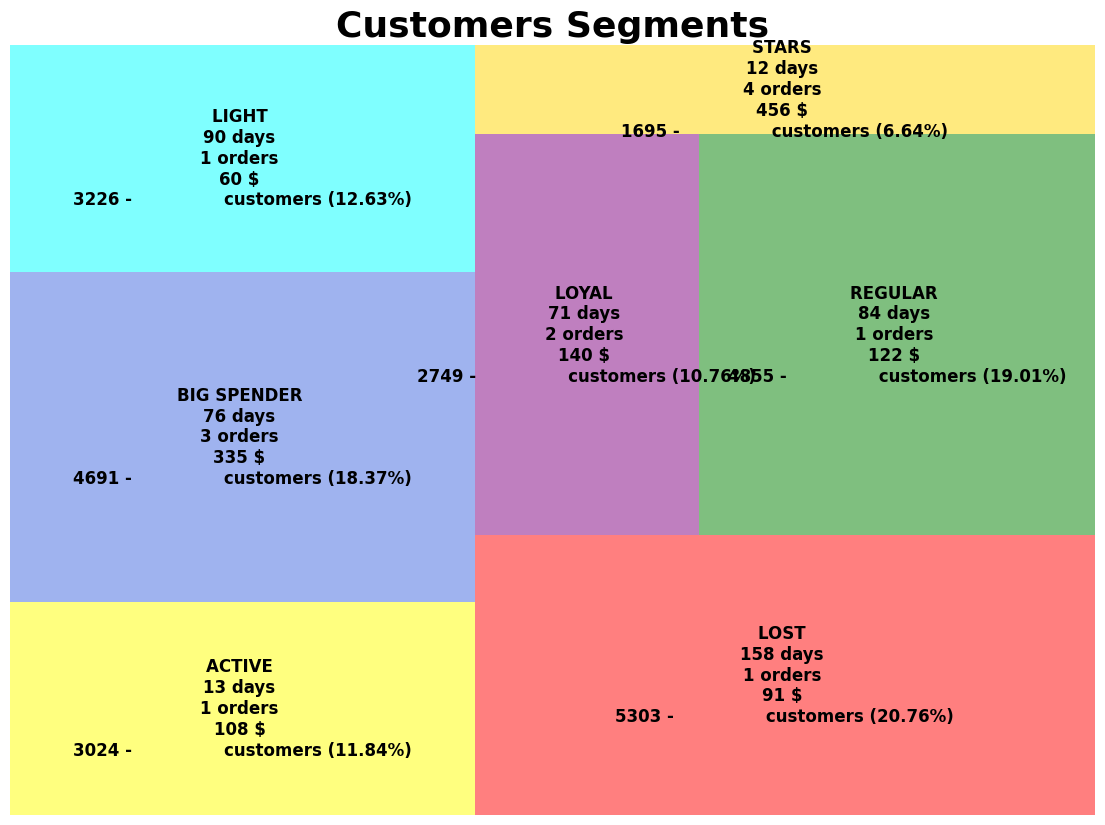

In [33]:
# Create our plot an resize it\
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)
colors_dict = {'ACTIVE' :'yellow' , 'BIG SPENDER': 'royalblue',
      'LIGHT': 'cyan', 'LOST':'red', 'LOYAL': 'purple','POTENTIAL':'green',
      'STARS' : 'gold'}

squarify.plot(sizes = rfm_agg['Count'],
           text_kwargs= {'fontsize': 12, 'weight':'bold','fontname':'sans serif'},
            color = colors_dict.values(),
            label = ['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} \
-                customers ({}%)'.format(*rfm_agg.iloc[i]) for i in range(0, len(rfm_agg))], alpha = 0.5)

plt.title('Customers Segments', fontsize = 26 , fontweight  = 'bold')
plt.axis('off')

plt.savefig('RFM Segments.png')
plt.show()

## Scatter Plot(RFM)

In [34]:
import plotly.express as px

fig = px.scatter(rfm_agg, x= 'RecencyMean', y = 'MonetaryMean', size = 'FrequencyMean',
      color = 'RFM_Level', hover_name ='RFM_Level', size_max = 100)
fig.show()

## 3D Scatter Plot(RFM)

In [35]:
import plotly.express as px

fig = px.scatter_3d(df_RFM , x = 'Recency', y = 'Frequency', z = 'Monetary',
         color = 'RFM_Level', opacity = 0.5,
         color_discrete_map= colors_dict)

fig.update_traces(marker = dict(size = 5),
      selector= dict(mode  = 'markers'))

fig.show()

## Kmeans clusters with the Elbow Method

In [36]:
# chi lay 3 cot tu df
df_now = df_RFM[['Recency', 'Frequency', 'Monetary']]
df_now

,Recency,Frequency,Monetary
20541,4,17,2812.58
2820,98,17,2661.72
15644,5,16,2486.73
19140,0,20,2325.06
19692,50,13,2065.88
...,...,...,...
10453,167,1,0.00
10521,169,1,0.00
10524,179,1,0.00
10533,155,1,0.00


In [37]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1,20):
    kmeans = KMeans(n_clusters= k , random_state= 42)
    kmeans.fit(df_now)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
    

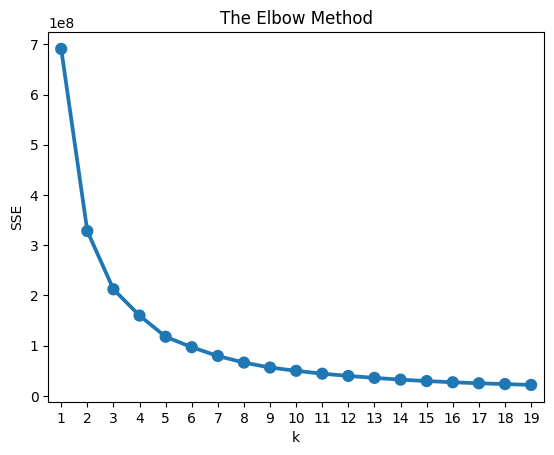

In [38]:
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x = list(sse.keys()) , y = list(sse.values()))
plt.show()

In [39]:
# Build model with k = 5
model = KMeans(n_clusters = 5, random_state = 42)
model.fit(df_now)
model.labels_.shape

(25543,)

In [40]:
df_now['Cluster'] = model.labels_
df_now.groupby('Cluster').agg({
    'Recency' : 'mean',
    'Frequency': 'mean',
    'Monetary':['mean', 'count']
}).round(2)

C:\Users\VU\AppData\Local\Temp\ipykernel_13840\734804190.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
0         39.00      1.32   111.69   8285
1         44.35      4.18   535.70   1503
2        136.81      1.14    90.29  10202
3         65.91      2.42   272.79   5364
4         29.53      7.69  1125.21    189

In [41]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg2 = df_now.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(0)

rfm_agg2.columns = rfm_agg2.columns.droplevel()
rfm_agg2.columns = ['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count']
rfm_agg2['Percent'] = round((rfm_agg2['Count']/ rfm_agg2.Count.sum()) * 100 , 2)

# Reset the index
rfm_agg2 = rfm_agg2.reset_index()

# Change the Cluster Columns DataType into discrete values

rfm_agg2['Cluster'] = 'Cluster' + rfm_agg2['Cluster'].astype('str')

# Print the aggregated dataset
rfm_agg2

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Cluster0,39.0,1.0,112.0,8285,32.44
1,Cluster1,44.0,4.0,536.0,1503,5.88
2,Cluster2,137.0,1.0,90.0,10202,39.94
3,Cluster3,66.0,2.0,273.0,5364,21.00
4,Cluster4,30.0,8.0,1125.0,189,0.74


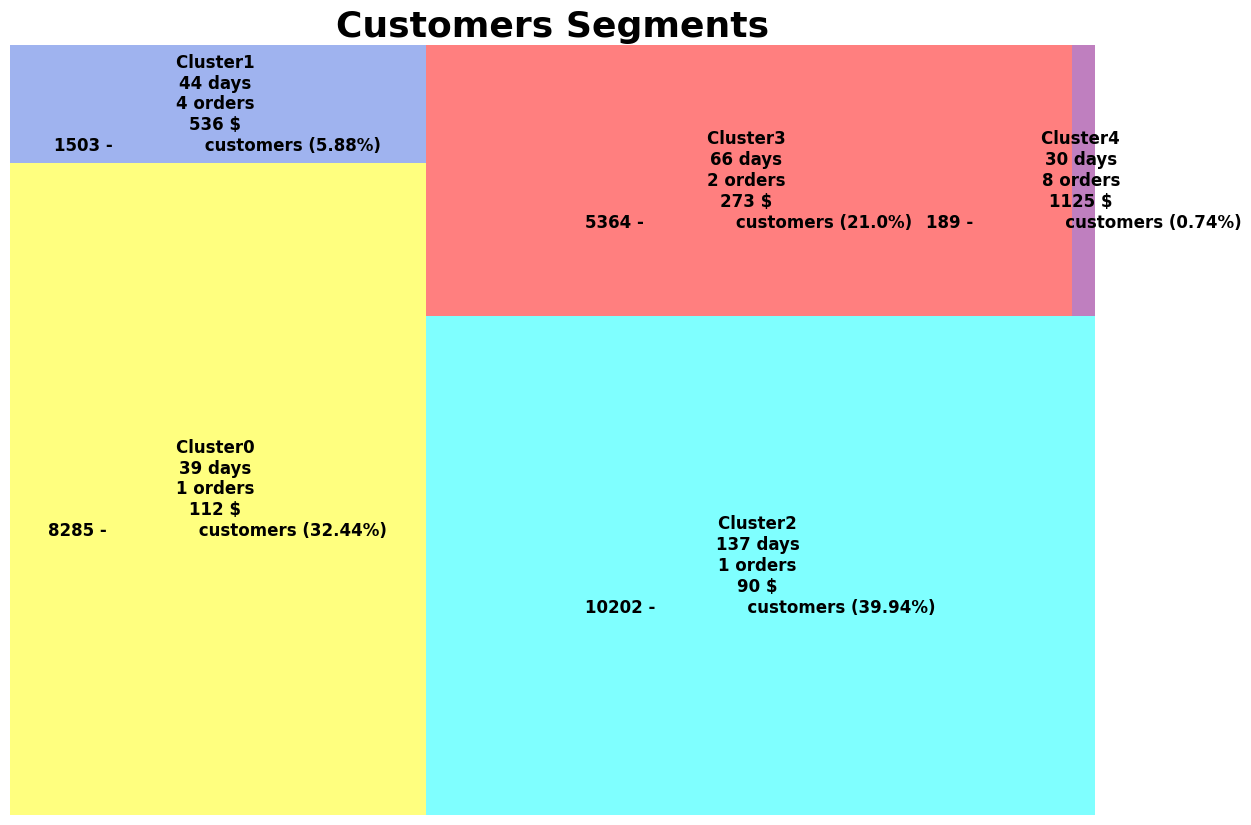

In [42]:
# Create our plot and resize it
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)
colors_dict2 = {'Cluster0' :'yellow' , 'Cluster1': 'royalblue',
      'Cluster2': 'cyan', 'Cluster3':'red', 'Cluster4': 'purple','Cluster5':'green'}

squarify.plot(sizes = rfm_agg2['Count'],
           text_kwargs= {'fontsize': 12, 'weight':'bold','fontname':'sans serif'},
            color = colors_dict2.values(),
            label = ['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} \
-                customers ({}%)'.format(*rfm_agg2.iloc[i]) for i in range(0, len(rfm_agg2))], alpha = 0.5)

plt.title('Customers Segments', fontsize = 26 , fontweight  = 'bold')
plt.axis('off')

plt.savefig('Unsupervised Segment.png')
plt.show()

In [43]:
import plotly.express as px
fig = px.scatter(rfm_agg2 , x= 'RecencyMean' , y = 'MonetaryMean',size = 'FrequencyMean',
    color = 'Cluster', hover_name= 'Cluster', size_max= 100)
fig.show()

In [44]:
fig = px.scatter_3d(rfm_agg2 , x= 'RecencyMean',y = 'FrequencyMean',
   z = 'MonetaryMean', color ='Cluster', opacity = 0.3)
fig.update_traces(marker = dict(size = 20),
     selector = dict(mode = 'markers'))

fig.show()

In [46]:
df_RFM.head()

,customer_id,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
20541,8325158,4,17,2812.58,4,4,4,444,12,STARS
2820,2028611,98,17,2661.72,2,4,4,244,10,BIG SPENDER
15644,6578818,5,16,2486.73,4,4,4,444,12,STARS
19140,7843272,0,20,2325.06,4,4,4,444,12,STARS
19692,8032770,50,13,2065.88,3,4,4,344,11,BIG SPENDER


In [52]:
result = df_RFM.loc[df_RFM['customer_id'] == 2028611]

In [53]:
result

,customer_id,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
2820,2028611,98,17,2661.72,2,4,4,244,10,BIG SPENDER
